In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

/Users/uranus/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.units import Unit
import sncosmo

ImportError: No module named sncosmo

In [4]:
from OpSimSummary import summarize_opsim as so
from sqlalchemy import create_engine
import pandas as pd

ImportError: No module named OpSimSummary

In [4]:
dbname = '/Users/rbiswas/data/LSST/OpSimData/enigma_1189_sqlite.db'
#opsdb = db.OpsimDatabase(dbname)
#propID, propTags = opsdb.fetchPropInfo()
#DD = propTags['DD'][0]
#WFD = propTags['WFD'][0]
# Read in the OpSim DataBas

In [5]:
from lsst.sims.maf import db
from lsst.sims.maf.utils import opsimUtils

In [6]:
engine = create_engine('sqlite:///' + dbname)

In [7]:
EnigmaDeep_direct = pd.read_sql_query('SELECT * FROM SUMMARY WHERE PROPID is 366 and fieldId is 290', 
                                      engine, index_col='obsHistID')

In [8]:
summary = so.SummaryOpsim(EnigmaDeep_direct)

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


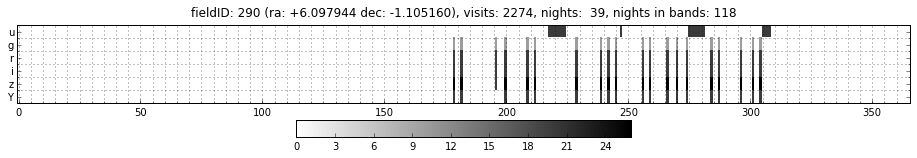

In [9]:
cadence_fig, cadence_mat = summary.cadence_plot(290)

In [29]:
summary.mjdvalfornight(250)

49603

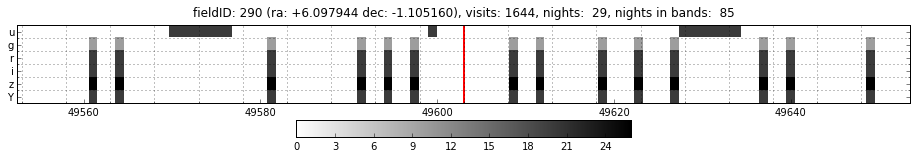

In [11]:
fig, mat = summary.cadence_plot(290, mjd_center=49603, mjd_range=[-50, 50])

In [12]:
x = EnigmaDeep_direct.query('night > 200 and night < 300').copy(deep=True)

In [13]:
x = x[x['filter']=='r']

In [31]:
len(x)

280

In [14]:
x[['filter', 'expMJD']].head()

,filter,expMJD
obsHistID,,
165827,r,49561.251252
165828,r,49561.251681
165829,r,49561.252109
165830,r,49561.252526
165831,r,49561.252942


In [15]:
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2-extended', effects=[dust, dust],
                               effect_names=['host', 'mw'],
                               effect_frames=['rest', 'obs'])

In [16]:
model.set(z=1.0, c=0., x1=0., t0=49603)
model.set_source_peakabsmag(-19.3, 'bessellb', 'ab')

In [17]:
print model

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 1.0
  t0      = 49603.0
  x0      = 1.8469279661995543e-06
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0
  mwr_v   = 3.1000000000000001


In [18]:
import os
throughputsDir = os.getenv('THROUGHPUTSDIR')

In [19]:
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')
# lsstbands = list()
# lsstbp = dict()

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name='LSST_' + band)

    sncosmo.registry.register(sncosmoband, force=True)

In [20]:
times = np.arange(-20., 50., 1.)

In [21]:
times=x.expMJD.values
bands = x['filter'].apply(lambda x: 'LSST_' + x)

In [22]:
model.bandmag(time=times, band=bands, magsys='ab')

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
        26.66213442,  26.66206235,  26.66199028,  26.66191805,
        26.66184801,  26.66177579,  26.66170373,  26.6616337 ,
        26.66156351,  26.66149331,  26.66142329,  26.66135108,
        26.66127905,  26.66120886,  26.66113683,  26.66106666,
        26.66099665,  26.66092463,  26.66085244,  26.66078043,
        25.55847234,  25.55845245,  25.55843257,  25.55

In [23]:
x['bandmag'] = model.bandmag(time=times, band=bands, magsys='ab')

In [35]:
x[['expMJD', 'filter', 'finSeeing', 'bandmag']].head()

,expMJD,filter,finSeeing,bandmag
obsHistID,,,,
165827,49561.251252,r,0.962640,NaN
165828,49561.251681,r,0.962342,NaN
165829,49561.252109,r,0.951342,NaN
165830,49561.252526,r,0.951072,NaN
165831,49561.252942,r,0.950811,NaN


In [33]:
x.columns

Index([u'sessionID', u'propID', u'fieldID', u'fieldRA', u'fieldDec', u'filter', u'expDate', u'expMJD', u'night', u'visitTime', u'visitExpTime', u'finRank', u'finSeeing', u'transparency', u'airmass', u'vSkyBright', u'filtSkyBrightness', u'rotSkyPos', u'lst', u'altitude', u'azimuth', u'dist2Moon', u'solarElong', u'moonRA', u'moonDec', u'moonAlt', u'moonAZ', u'moonPhase', u'sunAlt', u'sunAz', u'phaseAngle', u'rScatter', u'mieScatter', u'moonIllum', u'moonBright', u'darkBright', u'rawSeeing', u'wind', u'humidity', u'slewDist', u'slewTime', u'fiveSigmaDepth', u'ditheredRA', u'ditheredDec', u'bandmag'], dtype='object')

In [37]:
x[['expMJD', 'filter', 'finSeeing', 'bandmag']].to_csv('/Users/rbiswas/doc/projects/meetings/DESC_2015_ANL/hack/hackday_10302015/SN_opsim.csv', index_label='obsHistID', na_rep='nan')

In [38]:
moretimes=np.arange(49603-50., 49603 + 50., 1.)

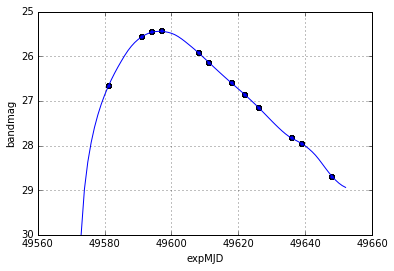

In [39]:
ax = x[x['filter']=='r'].plot(x='expMJD', y='bandmag', kind='scatter')
ax.invert_yaxis()
ax.set_ylim(ymin=30.)
ax.plot(moretimes, model.bandmag(time=moretimes, band='LSST_r', magsys='ab'))

### Scratch

In [27]:
#band = ['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'LSST_y'] 
#bands = band * len(times)
lcdict = dict()
lcdict['time'] = times
lcdict['u'] = model.bandmag(time=times.tolist() , band='LSST_u', magsys='ab')
lcdict['g'] = model.bandmag(time=times.tolist() , band='LSST_g', magsys='ab')
lcdict['r'] = model.bandmag(time=times.tolist() , band='LSST_r', magsys='ab')
lcdict['i'] = model.bandmag(time=times.tolist() , band='LSST_i', magsys='ab')
lcdict['z'] = model.bandmag(time=times.tolist() , band='LSST_z', magsys='ab')
lcdict['y'] = model.bandmag(time=times.tolist() , band='LSST_y', magsys='ab')

In [28]:
import pandas as pd
lc = pd.DataFrame(lcdict)

In [29]:
ax = .plot(x='time', y=['r', 'i', 'z'])
ax.invert_yaxis()

SyntaxError: invalid syntax (<ipython-input-29-afa1213bd834>, line 1)

In [ ]:
lc.to_csv('SN_z1.csv')

In [30]:
!pwd

/Users/rbiswas/doc/projects/meetings/DESC_2015_ANL/hack
